In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


Membaca Dataset

In [3]:
df = pd.read_csv('../data/calonpembelimobil.csv')
df.head()


,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
0,1,32,1,0,0,240,1
1,2,49,2,1,1,100,0
2,3,52,1,0,2,250,1
3,4,26,2,1,1,130,0
4,5,45,3,0,2,237,1


Menampilkan Informasi Data

In [4]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ID              1000 non-null   int64
 1   Usia            1000 non-null   int64
 2   Status          1000 non-null   int64
 3   Kelamin         1000 non-null   int64
 4   Memiliki_Mobil  1000 non-null   int64
 5   Penghasilan     1000 non-null   int64
 6   Beli_Mobil      1000 non-null   int64
dtypes: int64(7)
memory usage: 54.8 KB


ID                0
Usia              0
Status            0
Kelamin           0
Memiliki_Mobil    0
Penghasilan       0
Beli_Mobil        0
dtype: int64

Menentukan Fitur dan Target

In [5]:
X = df[['Usia', 'Status', 'Kelamin', 'Memiliki_Mobil', 'Penghasilan']]
y = df['Beli_Mobil']


Membagi Dataset menjadi Data Latih dan Uji

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Normalisasi Data

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Membuat dan Melatih Model Logistic Regression

In [8]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


Melakukan Prediksi dan Evaluasi Model

In [9]:
y_pred = model.predict(X_test_scaled)

print("Akurasi:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Akurasi: 0.925
Confusion Matrix:
 [[ 55   9]
 [  6 130]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.86      0.88        64
           1       0.94      0.96      0.95       136

    accuracy                           0.93       200
   macro avg       0.92      0.91      0.91       200
weighted avg       0.92      0.93      0.92       200



Visualisasi

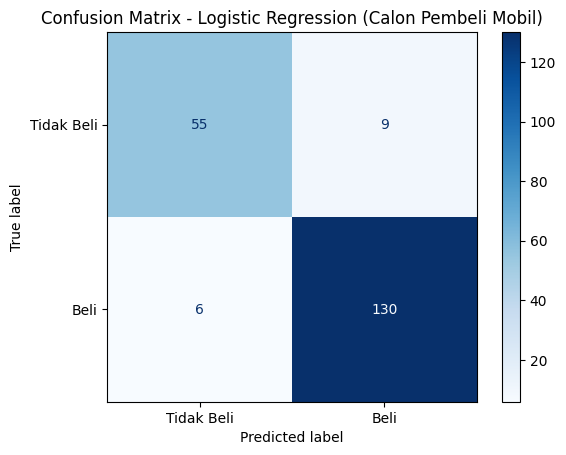

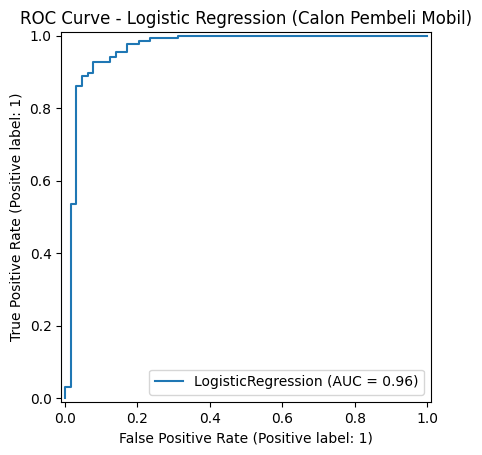

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, confusion_matrix

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Tidak Beli', 'Beli'])
disp.plot(values_format='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression (Calon Pembeli Mobil)")
plt.show()

RocCurveDisplay.from_estimator(model, X_test_scaled, y_test)
plt.title("ROC Curve - Logistic Regression (Calon Pembeli Mobil)")
plt.show()


Menguji Model dengan Dataset Baru

In [10]:
data_baru = pd.DataFrame({
    'Usia': [23, 35, 28, 45, 31, 40, 26, 50, 29, 33],
    'Status': [1, 2, 1, 2, 1, 2, 1, 2, 1, 2],
    'Kelamin': [1, 0, 1, 1, 0, 1, 0, 1, 1, 0],
    'Memiliki_Mobil': [0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
    'Penghasilan': [220, 180, 150, 300, 200, 250, 130, 400, 160, 220]
})

data_baru_scaled = scaler.transform(data_baru)
prediksi = model.predict(data_baru_scaled)
data_baru['Prediksi_Beli'] = prediksi
data_baru


,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Prediksi_Beli
0,23,1,1,0,220,0
1,35,2,0,1,180,0
2,28,1,1,0,150,0
3,45,2,1,1,300,1
4,31,1,0,0,200,0
5,40,2,1,1,250,1
6,26,1,0,0,130,0
7,50,2,1,1,400,1
8,29,1,1,0,160,0
9,33,2,0,1,220,1
